In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import os
import math
import copy
import statistics

pd.set_option('display.max_rows', None)

# Gather logs

### RAW data logs

In [2]:
dir_path = '../logs_v2/'

In [3]:
times_dict = {
    'bucket_split_time': None,
    'bucket_sort_time': None,
    'bucket_to_array_time': None,
    'table_fill_time': None,
    'program_time': None
}

In [4]:
run_dict = {
    'algorithm': None,
    'points': None,
    'buckets': None,
    'threads': None,
    'times': []
}

In [5]:
all_run_dict_raw_data = []

In [6]:
df = pd.DataFrame()

for filename in os.listdir(dir_path):
    if filename.endswith('.log'):
        # Create new entry structures
        tmp_run_dict = copy.deepcopy(run_dict)
        tmp_times_dict = copy.deepcopy(times_dict)
        
        # Fill run_dict structure
        run_specification = filename.split('_')
        tmp_run_dict['algorithm'] = int(run_specification[1])
        tmp_run_dict['points'] = int(run_specification[3])
        tmp_run_dict['buckets'] = int(run_specification[5])
        tmp_run_dict['threads'] = int(run_specification[7][0])
        
        # Fill times_dict structure
        with open(dir_path+filename, 'r') as file_object:
            for line in file_object:
                if line.startswith('-'):
                    continue
                elif line.startswith('program_time'):
                    line_words = line.split(' ')
                    tmp_times_dict[line_words[0]] = line_words[1]
                    tmp_run_dict['times'].append(copy.deepcopy(tmp_times_dict))
                else:
                    line_words = line.split(' ')
                    tmp_times_dict[line_words[0]] = line_words[1]

        all_run_dict_raw_data.append(copy.deepcopy(tmp_run_dict))

In [7]:
all_run_dict_raw_data[:3]

[{'algorithm': 2,
  'points': 4000000,
  'buckets': 4000,
  'threads': 1,
  'times': [{'bucket_split_time': '0.28265',
    'bucket_sort_time': '0.959882',
    'bucket_to_array_time': '0.077969',
    'table_fill_time': '0.737158',
    'program_time': '2.07413'},
   {'bucket_split_time': '0.279278',
    'bucket_sort_time': '0.960031',
    'bucket_to_array_time': '0.077839',
    'table_fill_time': '0.739677',
    'program_time': '2.0736'},
   {'bucket_split_time': '0.271498',
    'bucket_sort_time': '0.96063',
    'bucket_to_array_time': '0.077975',
    'table_fill_time': '0.739879',
    'program_time': '2.06587'},
   {'bucket_split_time': '0.281143',
    'bucket_sort_time': '0.960846',
    'bucket_to_array_time': '0.077841',
    'table_fill_time': '0.736966',
    'program_time': '2.07341'},
   {'bucket_split_time': '0.27707',
    'bucket_sort_time': '0.958175',
    'bucket_to_array_time': '0.077684',
    'table_fill_time': '0.738498',
    'program_time': '2.06877'},
   {'bucket_split_tim

### Mean and std_dev data logs

In [8]:
run_dict_mean_times = {
    'algorithm': None,
    'points': None,
    'buckets': None,
    'threads': None,
    'times': {
        'bucket_split': {
            'mean_time': None,
            'std_dev': None },
        'bucket_sort': {
            'mean_time': None,
            'std_dev': None },
        'bucket_to_array': {
            'mean_time': None,
            'std_dev': None },
        'table_fill': {
            'mean_time': None,
            'std_dev': None },
        'program_execution': {
            'mean_time': None,
            'std_dev': None }
    }
}

In [9]:
def get_measurements(run_measurement, type_of_measurement):
    return list(map(lambda x: float(x[type_of_measurement]), run_measurement['times']))

In [10]:
all_run_dict_mean_times = []

In [11]:
for elem in all_run_dict_raw_data:
    # Create new entry structures
    tmp_run_dict = copy.deepcopy(run_dict_mean_times)
    
    tmp_run_dict['algorithm'] = elem['algorithm']
    tmp_run_dict['points'] = elem['points']
    tmp_run_dict['buckets'] = elem['buckets']
    tmp_run_dict['threads'] = elem['threads']
    
    tmp_run_dict['times']['bucket_split']['mean_time'] = \
        statistics.mean(get_measurements(elem, 'bucket_split_time'))
    tmp_run_dict['times']['bucket_split']['std_dev'] = \
        statistics.stdev(get_measurements(elem, 'bucket_split_time'))
    tmp_run_dict['times']['bucket_sort']['mean_time'] = \
        statistics.mean(get_measurements(elem, 'bucket_sort_time'))
    tmp_run_dict['times']['bucket_sort']['std_dev'] = \
        statistics.stdev(get_measurements(elem, 'bucket_sort_time')) 
    tmp_run_dict['times']['bucket_to_array']['mean_time'] = \
        statistics.mean(get_measurements(elem, 'bucket_to_array_time'))
    tmp_run_dict['times']['bucket_to_array']['std_dev'] = \
        statistics.stdev(get_measurements(elem, 'bucket_to_array_time')) 
    tmp_run_dict['times']['table_fill']['mean_time'] = \
        statistics.mean(get_measurements(elem, 'table_fill_time'))
    tmp_run_dict['times']['table_fill']['std_dev'] = \
        statistics.stdev(get_measurements(elem, 'table_fill_time')) 
    tmp_run_dict['times']['program_execution']['mean_time'] = \
        statistics.mean(get_measurements(elem, 'program_time'))
    tmp_run_dict['times']['program_execution']['std_dev'] = \
        statistics.stdev(get_measurements(elem, 'program_time'))
    
    all_run_dict_mean_times.append(copy.deepcopy(tmp_run_dict))

In [12]:
all_run_dict_mean_times[:2]

[{'algorithm': 2,
  'points': 4000000,
  'buckets': 4000,
  'threads': 1,
  'times': {'bucket_split': {'mean_time': 0.2780649,
    'std_dev': 0.003050165075678507},
   'bucket_sort': {'mean_time': 0.9599368, 'std_dev': 0.0008818490422591224},
   'bucket_to_array': {'mean_time': 0.0774514,
    'std_dev': 0.00047425876668521084},
   'table_fill': {'mean_time': 0.7385753, 'std_dev': 0.0012782722758125946},
   'program_execution': {'mean_time': 2.07087,
    'std_dev': 0.0030175744490493453}}},
 {'algorithm': 1,
  'points': 4000000,
  'buckets': 400000,
  'threads': 4,
  'times': {'bucket_split': {'mean_time': 0.9920906,
    'std_dev': 0.1164480603036774},
   'bucket_sort': {'mean_time': 0.1705379, 'std_dev': 0.01366672582466871},
   'bucket_to_array': {'mean_time': 0.0989042, 'std_dev': 0.01184526796094823},
   'table_fill': {'mean_time': 0.3507157, 'std_dev': 0.03267011324352036},
   'program_execution': {'mean_time': 1.817932,
    'std_dev': 0.11901165823378632}}}]

# Exercise 3

In [13]:
point_types = set(map(lambda x: x['points'], all_run_dict_mean_times))
buckets_types = set(map(lambda x: x['buckets'], all_run_dict_mean_times))
threads_types = set(map(lambda x: x['threads'], all_run_dict_mean_times))

In [14]:
speedup_dict = {
    'algorithm': None,
    'points': None,
    'buckets': None,
    'threads': {
        'bucket_split': {
            '2': None,
            '3': None,
            '4': None
        },
        'bucket_sort': {
            '2': None,
            '3': None,
            '4': None
        },
        'bucket_to_array': {
            '2': None,
            '3': None,
            '4': None
        },
        'table_fill': {
            '2': None,
            '3': None,
            '4': None
        },
        'program_execution': {
            '2': None,
            '3': None,
            '4': None
        }
    }
}

### algorithm 1

In [125]:
algorithm_2_runs = list(filter(lambda x: x['algorithm'] == 1, all_run_dict_mean_times))

In [126]:
algorithm_2_speedup = []

In [127]:
for points in point_types:
    selected_elems = list(filter(lambda x: x['points']==points and \
                                           x['buckets']==points/10, 
                                           algorithm_2_runs))

    if len(selected_elems) == 4:
        # Create new entry structures
        tmp_run_dict = copy.deepcopy(speedup_dict)

        tmp_run_dict['algorithm'] = selected_elems[0]['algorithm']
        tmp_run_dict['points'] = selected_elems[0]['points']
        tmp_run_dict['buckets'] = selected_elems[0]['buckets']

        time_1_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['bucket_split']['mean_time'])
        time_2_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['bucket_split']['mean_time'])
        time_3_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['bucket_split']['mean_time'])
        time_4_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['bucket_split']['mean_time'])

        time_1_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['bucket_sort']['mean_time'])
        time_2_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['bucket_sort']['mean_time'])
        time_3_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['bucket_sort']['mean_time'])
        time_4_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['bucket_sort']['mean_time'])

        time_1_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['bucket_to_array']['mean_time'])
        time_2_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['bucket_to_array']['mean_time'])
        time_3_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['bucket_to_array']['mean_time'])
        time_4_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['bucket_to_array']['mean_time'])

        time_1_threads_table_fill = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['table_fill']['mean_time'])
        time_2_threads_table_fill = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['table_fill']['mean_time'])
        time_3_threads_table_fill = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['table_fill']['mean_time'])
        time_4_threads_table_fill = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['table_fill']['mean_time'])

        time_1_threads_program_execution = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['program_execution']['mean_time'])
        time_2_threads_program_execution = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['program_execution']['mean_time'])
        time_3_threads_program_execution = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['program_execution']['mean_time'])
        time_4_threads_program_execution = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['program_execution']['mean_time'])

        tmp_run_dict['threads']['bucket_split']['2'] = time_1_threads_bucket_split / time_2_threads_bucket_split
        tmp_run_dict['threads']['bucket_split']['3'] = time_1_threads_bucket_split / time_3_threads_bucket_split
        tmp_run_dict['threads']['bucket_split']['4'] = time_1_threads_bucket_split / time_4_threads_bucket_split

        tmp_run_dict['threads']['bucket_sort']['2'] = time_1_threads_bucket_sort / time_2_threads_bucket_sort
        tmp_run_dict['threads']['bucket_sort']['3'] = time_1_threads_bucket_sort / time_3_threads_bucket_sort
        tmp_run_dict['threads']['bucket_sort']['4'] = time_1_threads_bucket_sort / time_4_threads_bucket_sort

        tmp_run_dict['threads']['bucket_to_array']['2'] = time_1_threads_bucket_to_array / time_2_threads_bucket_to_array
        tmp_run_dict['threads']['bucket_to_array']['3'] = time_1_threads_bucket_to_array / time_3_threads_bucket_to_array
        tmp_run_dict['threads']['bucket_to_array']['4'] = time_1_threads_bucket_to_array / time_4_threads_bucket_to_array

        tmp_run_dict['threads']['table_fill']['2'] = time_1_threads_table_fill / time_2_threads_table_fill
        tmp_run_dict['threads']['table_fill']['3'] = time_1_threads_table_fill / time_3_threads_table_fill
        tmp_run_dict['threads']['table_fill']['4'] = time_1_threads_table_fill / time_4_threads_table_fill

        tmp_run_dict['threads']['program_execution']['2'] = time_1_threads_program_execution / time_2_threads_program_execution
        tmp_run_dict['threads']['program_execution']['3'] = time_1_threads_program_execution / time_3_threads_program_execution
        tmp_run_dict['threads']['program_execution']['4'] = time_1_threads_program_execution / time_4_threads_program_execution

        algorithm_2_speedup.append(copy.deepcopy(tmp_run_dict))

In [128]:
algorithm_2_point_types = set(map(lambda x: x['points'], algorithm_2_speedup))
algorithm_2_buckets_types = set(map(lambda x: x['buckets'], algorithm_2_speedup))

In [129]:
algorithm_2_speedup = sorted(algorithm_2_speedup, key=lambda x: x['points'])

In [130]:
bucket_split_2_threads = []
bucket_split_3_threads = []
bucket_split_4_threads = []
bucket_sort_2_threads = []
bucket_sort_3_threads = []
bucket_sort_4_threads = []
bucket_to_array_2_threads = []
bucket_to_array_3_threads = []
bucket_to_array_4_threads = []
table_fill_2_threads = []
table_fill_3_threads = []
table_fill_4_threads = []
program_execution_2_threads = []
program_execution_3_threads = []
program_execution_4_threads = []

In [131]:
for elem in algorithm_2_speedup:
    bucket_split_2_threads.append(elem['threads']['bucket_split']['2'])
    bucket_split_3_threads.append(elem['threads']['bucket_split']['3'])
    bucket_split_4_threads.append(elem['threads']['bucket_split']['4'])
    bucket_sort_2_threads.append(elem['threads']['bucket_sort']['2'])
    bucket_sort_3_threads.append(elem['threads']['bucket_sort']['3'])
    bucket_sort_4_threads.append(elem['threads']['bucket_sort']['4'])
    bucket_to_array_2_threads.append(elem['threads']['bucket_to_array']['2'])
    bucket_to_array_3_threads.append(elem['threads']['bucket_to_array']['3'])
    bucket_to_array_4_threads.append(elem['threads']['bucket_to_array']['4'])
    table_fill_2_threads.append(elem['threads']['table_fill']['2'])
    table_fill_3_threads.append(elem['threads']['table_fill']['3'])
    table_fill_4_threads.append(elem['threads']['table_fill']['4'])
    program_execution_2_threads.append(elem['threads']['program_execution']['2'])
    program_execution_3_threads.append(elem['threads']['program_execution']['3'])
    program_execution_4_threads.append(elem['threads']['program_execution']['4'])

In [132]:
y = sorted(list(algorithm_2_point_types))

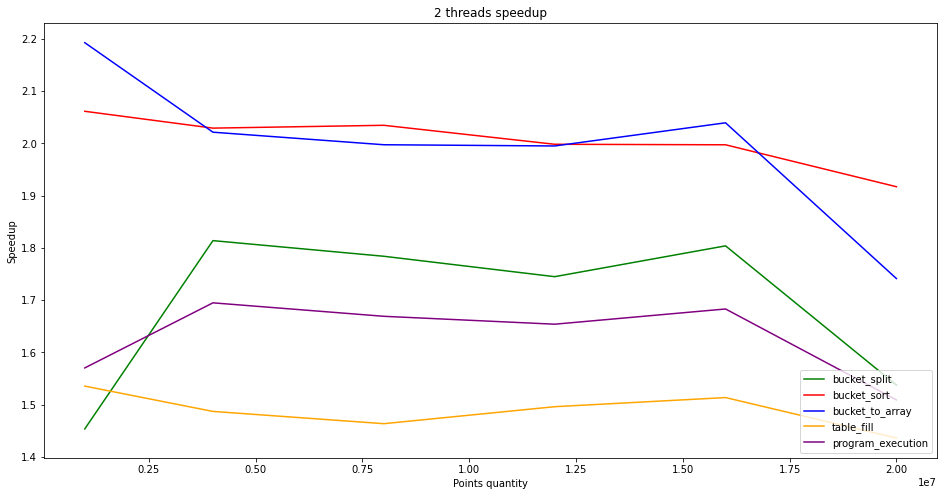

In [134]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(y, bucket_split_2_threads, c='green', label='bucket_split')
plt.plot(y, bucket_sort_2_threads, c='red', label='bucket_sort')
plt.plot(y, bucket_to_array_2_threads, c='blue', label='bucket_to_array')
plt.plot(y, table_fill_2_threads, c='orange', label='table_fill')
plt.plot(y, program_execution_2_threads, c='purple', label='program_execution')
plt.legend(loc="lower right")
plt.title("2 threads speedup")
plt.xlabel("Points quantity")
plt.ylabel("Speedup")
plt.show()

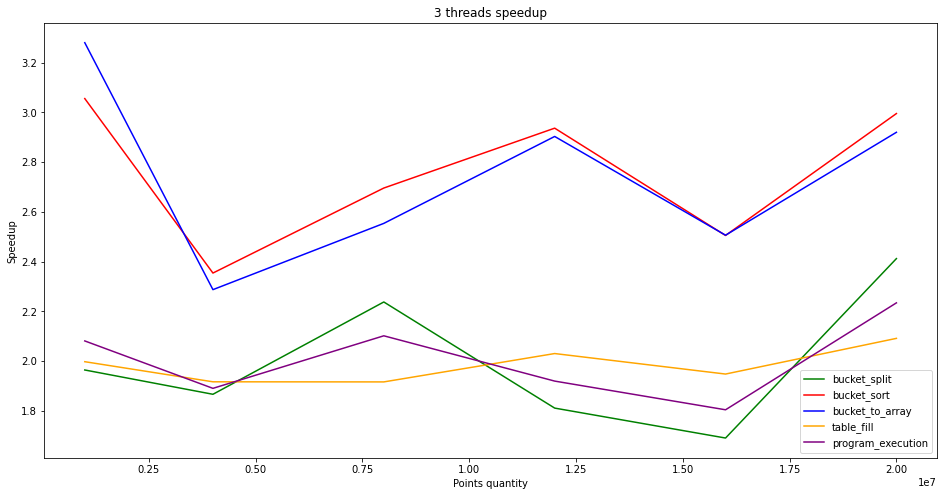

In [135]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(y, bucket_split_3_threads, c='green', label='bucket_split')
plt.plot(y, bucket_sort_3_threads, c='red', label='bucket_sort')
plt.plot(y, bucket_to_array_3_threads, c='blue', label='bucket_to_array')
plt.plot(y, table_fill_3_threads, c='orange', label='table_fill')
plt.plot(y, program_execution_3_threads, c='purple', label='program_execution')
plt.legend(loc="lower right")
plt.title("3 threads speedup")
plt.xlabel("Points quantity")
plt.ylabel("Speedup")
plt.show()

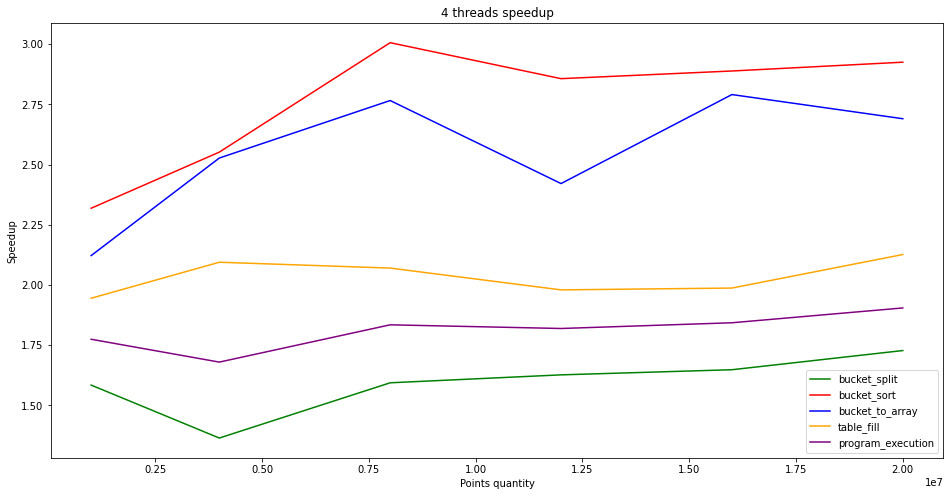

In [136]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(y, bucket_split_4_threads, c='green', label='bucket_split')
plt.plot(y, bucket_sort_4_threads, c='red', label='bucket_sort')
plt.plot(y, bucket_to_array_4_threads, c='blue', label='bucket_to_array')
plt.plot(y, table_fill_4_threads, c='orange', label='table_fill')
plt.plot(y, program_execution_4_threads, c='purple', label='program_execution')
plt.legend(loc="lower right")
plt.title("4 threads speedup")
plt.xlabel("Points quantity")
plt.ylabel("Speedup")
plt.show()

### algorithm 2

In [82]:
algorithm_2_runs = list(filter(lambda x: x['algorithm'] == 2, all_run_dict_mean_times))

In [83]:
algorithm_2_speedup = []

In [84]:
for points in point_types:
    selected_elems = list(filter(lambda x: x['points']==points and \
                                           x['buckets']==points/10, 
                                           algorithm_2_runs))

    if len(selected_elems) == 4:
        # Create new entry structures
        tmp_run_dict = copy.deepcopy(speedup_dict)

        tmp_run_dict['algorithm'] = selected_elems[0]['algorithm']
        tmp_run_dict['points'] = selected_elems[0]['points']
        tmp_run_dict['buckets'] = selected_elems[0]['buckets']

        time_1_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['bucket_split']['mean_time'])
        time_2_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['bucket_split']['mean_time'])
        time_3_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['bucket_split']['mean_time'])
        time_4_threads_bucket_split = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['bucket_split']['mean_time'])

        time_1_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['bucket_sort']['mean_time'])
        time_2_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['bucket_sort']['mean_time'])
        time_3_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['bucket_sort']['mean_time'])
        time_4_threads_bucket_sort = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['bucket_sort']['mean_time'])

        time_1_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['bucket_to_array']['mean_time'])
        time_2_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['bucket_to_array']['mean_time'])
        time_3_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['bucket_to_array']['mean_time'])
        time_4_threads_bucket_to_array = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['bucket_to_array']['mean_time'])

        time_1_threads_table_fill = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['table_fill']['mean_time'])
        time_2_threads_table_fill = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['table_fill']['mean_time'])
        time_3_threads_table_fill = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['table_fill']['mean_time'])
        time_4_threads_table_fill = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['table_fill']['mean_time'])

        time_1_threads_program_execution = float(list(filter(lambda x: x['threads'] == 1, selected_elems))[0]['times']['program_execution']['mean_time'])
        time_2_threads_program_execution = float(list(filter(lambda x: x['threads'] == 2, selected_elems))[0]['times']['program_execution']['mean_time'])
        time_3_threads_program_execution = float(list(filter(lambda x: x['threads'] == 3, selected_elems))[0]['times']['program_execution']['mean_time'])
        time_4_threads_program_execution = float(list(filter(lambda x: x['threads'] == 4, selected_elems))[0]['times']['program_execution']['mean_time'])

        tmp_run_dict['threads']['bucket_split']['2'] = time_1_threads_bucket_split / time_2_threads_bucket_split
        tmp_run_dict['threads']['bucket_split']['3'] = time_1_threads_bucket_split / time_3_threads_bucket_split
        tmp_run_dict['threads']['bucket_split']['4'] = time_1_threads_bucket_split / time_4_threads_bucket_split

        tmp_run_dict['threads']['bucket_sort']['2'] = time_1_threads_bucket_sort / time_2_threads_bucket_sort
        tmp_run_dict['threads']['bucket_sort']['3'] = time_1_threads_bucket_sort / time_3_threads_bucket_sort
        tmp_run_dict['threads']['bucket_sort']['4'] = time_1_threads_bucket_sort / time_4_threads_bucket_sort

        tmp_run_dict['threads']['bucket_to_array']['2'] = time_1_threads_bucket_to_array / time_2_threads_bucket_to_array
        tmp_run_dict['threads']['bucket_to_array']['3'] = time_1_threads_bucket_to_array / time_3_threads_bucket_to_array
        tmp_run_dict['threads']['bucket_to_array']['4'] = time_1_threads_bucket_to_array / time_4_threads_bucket_to_array

        tmp_run_dict['threads']['table_fill']['2'] = time_1_threads_table_fill / time_2_threads_table_fill
        tmp_run_dict['threads']['table_fill']['3'] = time_1_threads_table_fill / time_3_threads_table_fill
        tmp_run_dict['threads']['table_fill']['4'] = time_1_threads_table_fill / time_4_threads_table_fill

        tmp_run_dict['threads']['program_execution']['2'] = time_1_threads_program_execution / time_2_threads_program_execution
        tmp_run_dict['threads']['program_execution']['3'] = time_1_threads_program_execution / time_3_threads_program_execution
        tmp_run_dict['threads']['program_execution']['4'] = time_1_threads_program_execution / time_4_threads_program_execution

        algorithm_2_speedup.append(copy.deepcopy(tmp_run_dict))

In [85]:
algorithm_2_point_types = set(map(lambda x: x['points'], algorithm_2_speedup))
algorithm_2_buckets_types = set(map(lambda x: x['buckets'], algorithm_2_speedup))

In [86]:
algorithm_2_speedup = sorted(algorithm_2_speedup, key=lambda x: x['points'])

In [87]:
bucket_split_2_threads = []
bucket_split_3_threads = []
bucket_split_4_threads = []
bucket_sort_2_threads = []
bucket_sort_3_threads = []
bucket_sort_4_threads = []
bucket_to_array_2_threads = []
bucket_to_array_3_threads = []
bucket_to_array_4_threads = []
table_fill_2_threads = []
table_fill_3_threads = []
table_fill_4_threads = []
program_execution_2_threads = []
program_execution_3_threads = []
program_execution_4_threads = []

In [88]:
for elem in algorithm_2_speedup:
    bucket_split_2_threads.append(elem['threads']['bucket_split']['2'])
    bucket_split_3_threads.append(elem['threads']['bucket_split']['3'])
    bucket_split_4_threads.append(elem['threads']['bucket_split']['4'])
    bucket_sort_2_threads.append(elem['threads']['bucket_sort']['2'])
    bucket_sort_3_threads.append(elem['threads']['bucket_sort']['3'])
    bucket_sort_4_threads.append(elem['threads']['bucket_sort']['4'])
    bucket_to_array_2_threads.append(elem['threads']['bucket_to_array']['2'])
    bucket_to_array_3_threads.append(elem['threads']['bucket_to_array']['3'])
    bucket_to_array_4_threads.append(elem['threads']['bucket_to_array']['4'])
    table_fill_2_threads.append(elem['threads']['table_fill']['2'])
    table_fill_3_threads.append(elem['threads']['table_fill']['3'])
    table_fill_4_threads.append(elem['threads']['table_fill']['4'])
    program_execution_2_threads.append(elem['threads']['program_execution']['2'])
    program_execution_3_threads.append(elem['threads']['program_execution']['3'])
    program_execution_4_threads.append(elem['threads']['program_execution']['4'])

In [89]:
y = sorted(list(algorithm_2_point_types))

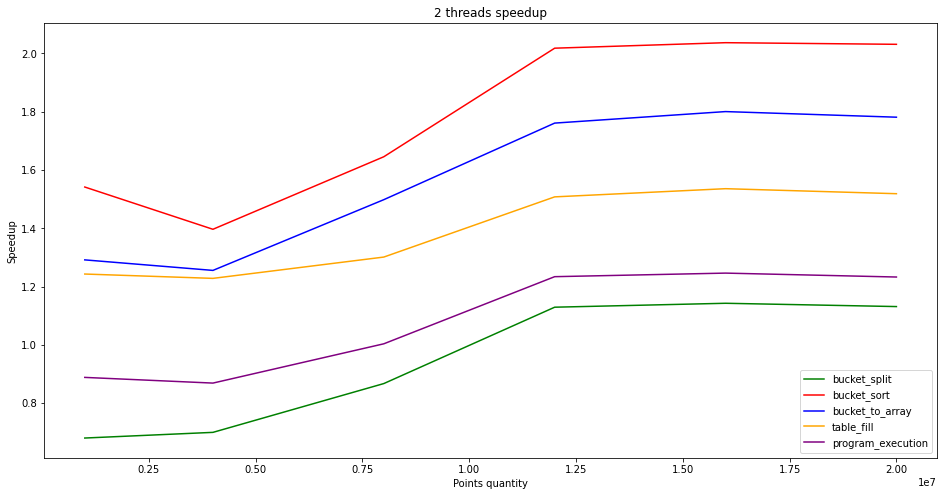

In [115]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(y, bucket_split_2_threads, c='green', label='bucket_split')
plt.plot(y, bucket_sort_2_threads, c='red', label='bucket_sort')
plt.plot(y, bucket_to_array_2_threads, c='blue', label='bucket_to_array')
plt.plot(y, table_fill_2_threads, c='orange', label='table_fill')
plt.plot(y, program_execution_2_threads, c='purple', label='program_execution')
plt.legend(loc="lower right")
plt.title("2 threads speedup")
plt.xlabel("Points quantity")
plt.ylabel("Speedup")
plt.show()

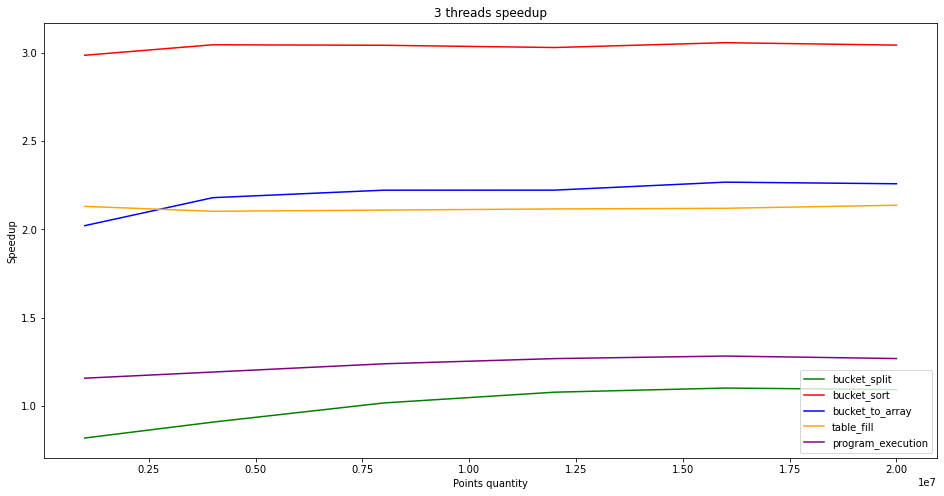

In [114]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(y, bucket_split_3_threads, c='green', label='bucket_split')
plt.plot(y, bucket_sort_3_threads, c='red', label='bucket_sort')
plt.plot(y, bucket_to_array_3_threads, c='blue', label='bucket_to_array')
plt.plot(y, table_fill_3_threads, c='orange', label='table_fill')
plt.plot(y, program_execution_3_threads, c='purple', label='program_execution')
plt.legend(loc="lower right")
plt.title("3 threads speedup")
plt.xlabel("Points quantity")
plt.ylabel("Speedup")
plt.show()

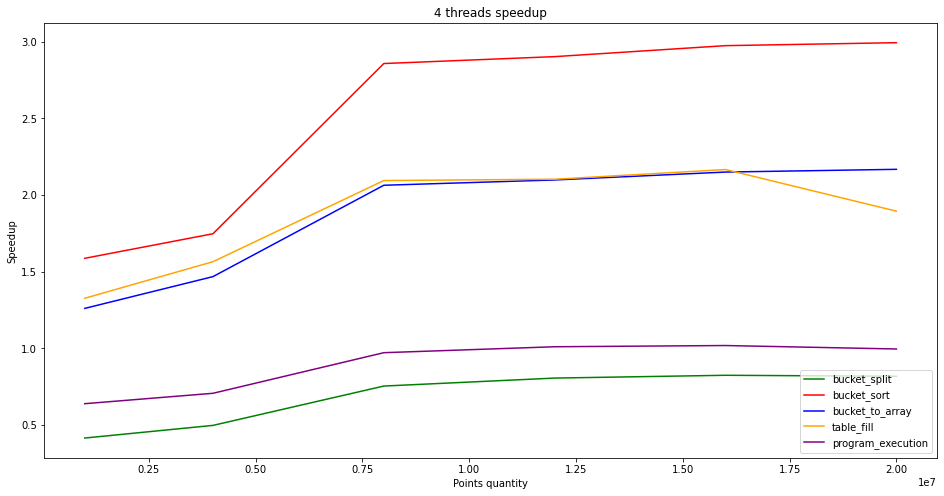

In [116]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)

plt.plot(y, bucket_split_4_threads, c='green', label='bucket_split')
plt.plot(y, bucket_sort_4_threads, c='red', label='bucket_sort')
plt.plot(y, bucket_to_array_4_threads, c='blue', label='bucket_to_array')
plt.plot(y, table_fill_4_threads, c='orange', label='table_fill')
plt.plot(y, program_execution_4_threads, c='purple', label='program_execution')
plt.legend(loc="lower right")
plt.title("4 threads speedup")
plt.xlabel("Points quantity")
plt.ylabel("Speedup")
plt.show()